In [1]:
import numpy as np
from PySDM.physics.constants import si
from settings import Settings
from simulation import Simulation
from PySDM import Formulae
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
hom_nucleation_rate = "Koop_Correction"
formulae = Formulae(
            particle_shape_and_density="MixedPhaseSpheres",
            homogeneous_ice_nucleation_rate=hom_nucleation_rate,
            seed=time.time_ns()
        )

In [6]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """
"""
Ensemble for:
1. n_sd
2. w
3. r & n_c
4. use diffrent hom. nucleation rates
Questions:
- where to store backend
- need to restart kernel if change in files outside notebook
"""
n_sd = 100
number_concentration_droplets = 850 / si.cm**3
mean_radius_dry_aerosol= 15 * si.nanometer


updraft = 1 * si.meter / si.second
initial_temperature =  formulae.trivia.C2K( -25. )
time_step = 0.1 * si.second
setting = Settings(
    formulae = formulae,
    n_sd = n_sd,
    w_updraft = updraft,
    T0 = initial_temperature,
    dt = time_step,
    N_dv_droplet_distribution = number_concentration_droplets,
    r_mean_droplet_distribution = mean_radius_dry_aerosol,
    type_droplet_distribution = "monodisperse",
    RH_0=0.995,
    condensation_enable = True,
    deposition_enable = False,
    hom_freezing = "threshold",
)

simulation = Simulation(setting)


Condensation enabled
[3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.85919804e-08 3.85919804e-08 3.85919804e-08 3.85919804e-08
 3.

In [7]:
output = simulation.run()

break due to LWC


Text(0, 0.5, 'number of super droplets')

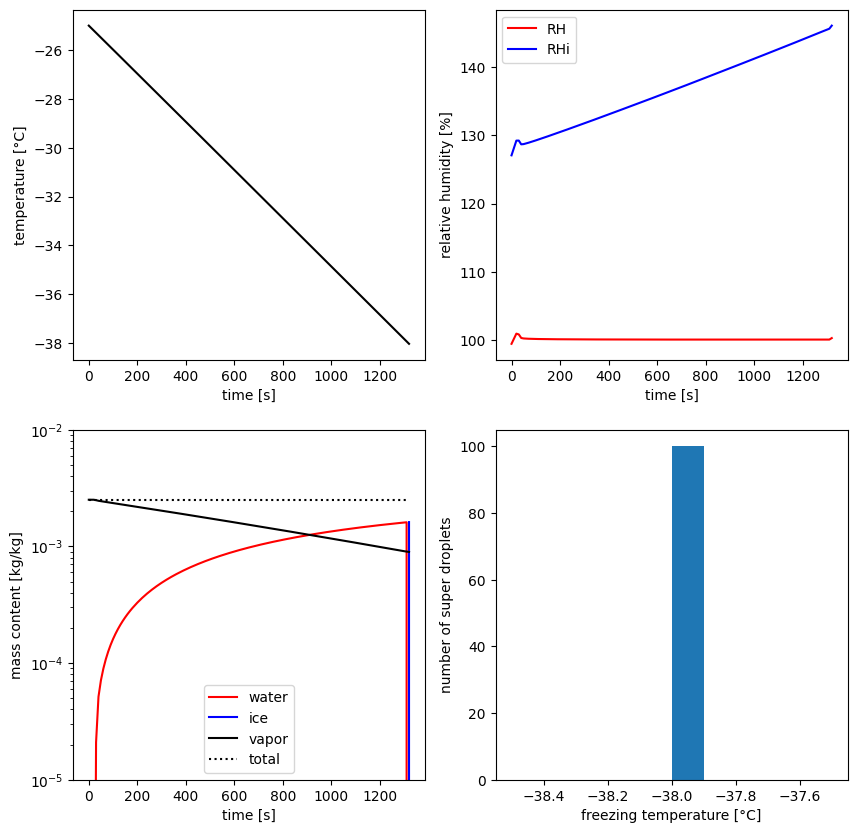

In [8]:
fig, axs = pyplot.subplots(2, 2, figsize=(10, 10), sharex=False)

time = output["t"]
T = np.asarray(output["T"])
RH = np.asarray(output["RH"])
RHi = np.asarray(output["RHi"])
qc = np.asarray(output["LWC"])
qi = np.asarray(output["IWC"])
qv = np.asarray(output["qv"])
T_frz = np.asarray(output["T_frz"][-1])
qt = qc + qv + qi

""" Temperture profile """
ax =axs[0,0]
ax.plot(
    time, formulae.trivia.K2C(T), color="black", linestyle="-"
)
ax.set_xlabel("time [s]")
ax.set_ylabel("temperature [°C]")

""" Relative humidity profile """
ax =axs[0,1]
ax.plot(
    time, RH, color="red", linestyle="-", label="RH"
)
ax.plot(
    time, RHi, color="blue", linestyle="-", label="RHi"
)
ax.set_xlabel("time [s]")
ax.set_ylabel("relative humidity [%]")
ax.legend()

""" Mass content """
ax =axs[1,0]
ax.plot(
    time, qc, color="red", linestyle="-", label="water"
)
ax.plot(
    time, qi, color="blue", linestyle="-", label="ice"
)
ax.plot(
    time, qv, color="black", linestyle="-", label="vapor"
)
ax.plot(
    time, qt, color="black", linestyle="dotted", label="total"
)
ax.set_yscale('log')
ax.set_ylim(1e-5,1e-2)
ax.set_xlabel("time [s]")
ax.set_ylabel("mass content [kg/kg]")
ax.legend()

""" Freezing temperatures """
ax = axs[1,1]
plt.hist( formulae.trivia.K2C(T_frz), density=False)
ax.set_xlabel("freezing temperature [°C]")
ax.set_ylabel("number of super droplets")
